In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA



In [74]:
# Loadind data
file_path = r"C:\Users\hp\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv"
data = pd.read_csv(file_path)

In [75]:
# Data Cleaning
# Removing columns with more than 50% missing values
missing_threshold = 0.5
missing_data = data.isnull().mean()
data_cleaned = data.drop(columns=missing_data[missing_data > missing_threshold].index)
data_cleaned = data_cleaned.drop(columns=['Tags'], errors='ignore')

# Filling missing values for numerical columns with the median
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())

# Filling missing values for categorical columns with the mode
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])

In [76]:
# Dropping columns that are irrelevant for modeling
irrelevant_columns = ['Prospect ID', 'Lead Number']
data_cleaned = data_cleaned.drop(columns=[col for col in irrelevant_columns if col in data_cleaned.columns])

In [77]:
# Handle invalid or missing values in 'Lead Profile' before label encoding
# Replacing 'Select' with a placeholder category like 'Unknown' or drop those rows
data_cleaned['Lead Profile'] = data_cleaned['Lead Profile'].replace('Select', 'Unknown')

# Re-defining categorical columns list (including 'Lead Profile')
categorical_cols = [col for col in data_cleaned.select_dtypes(include=['object']).columns if col != 'Tags']

# Applying label encoding to categorical columns, including 'Lead Profile'
label_encoder = LabelEncoder()
for col in categorical_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Impute missing values in 'Lead Profile' with the most frequent value
data_cleaned['Lead Profile'].fillna(data_cleaned['Lead Profile'].mode()[0], inplace=True)

# Feature and Target Variables
X = data_cleaned.drop('Converted', axis=1)
y = data_cleaned['Converted']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exclude 'Lead Number' and 'Converted' from the list of numerical columns
numerical_cols = [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns if col not in ['Lead Number', 'Converted']]

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42)

# Fiting the model
model.fit(X_train, y_train)

# Making predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8128
Precision: 0.7925
Recall: 0.7019
F1 Score: 0.7445
ROC AUC: 0.8784


In [78]:
# Checking columns with string values
string_columns = X_train.select_dtypes(include=['object']).columns
print(X_train[string_columns].head())



Empty DataFrame
Columns: []
Index: [4715, 7132, 8954, 5283, 3003]


In [79]:
print(X.columns)



Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [80]:
# Checking the data types of all columns in the cleaned data
print(data_cleaned.dtypes)


Lead Origin                                        int32
Lead Source                                        int32
Do Not Email                                       int32
Do Not Call                                        int32
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                      int32
Country                                            int32
Specialization                                     int32
How did you hear about X Education                 int32
What is your current occupation                    int32
What matters most to you in choosing a course      int32
Search                                             int32
Magazine                                           int32
Newspaper Article                                  int32
X Education Forums             

In [81]:
print(X_train.shape)  
print(y_train.shape)  


(6468, 32)
(6468,)


In [82]:

# Checking that X and y are aligned and have the same number of samples
print("Shape of X before splitting:", X.shape)
print("Shape of y before splitting:", y.shape)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking shapes after split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Standardize X_train and X_test (assuming scaling is needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the shapes after scaling
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=0.95)  # Retaining 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Checking if the number of samples in X_train_pca matches y_train
print("Shape of X_train_pca after PCA:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)

# Train Logistic Regression model with increased max_iter and regularization
model = LogisticRegression(solver='lbfgs', max_iter=10000, C=1.0, random_state=42)

# Train the model on PCA-reduced data
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Shape of X before splitting: (9240, 32)
Shape of y before splitting: (9240,)
Shape of X_train: (7392, 32)
Shape of y_train: (7392,)
Shape of X_train_scaled: (7392, 32)
Shape of X_test_scaled: (1848, 32)
Shape of X_train_pca after PCA: (7392, 22)
Shape of y_train: (7392,)
Accuracy: 0.80
Precision: 0.79
Recall: 0.69
F1 Score: 0.74
ROC-AUC: 0.87


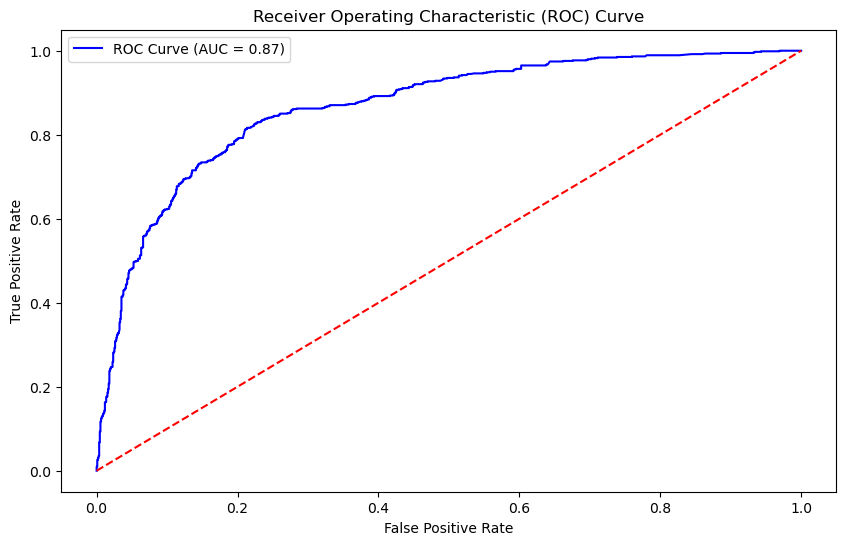

In [83]:
# Plotting the ROC Curve to understand model's discrimination power
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

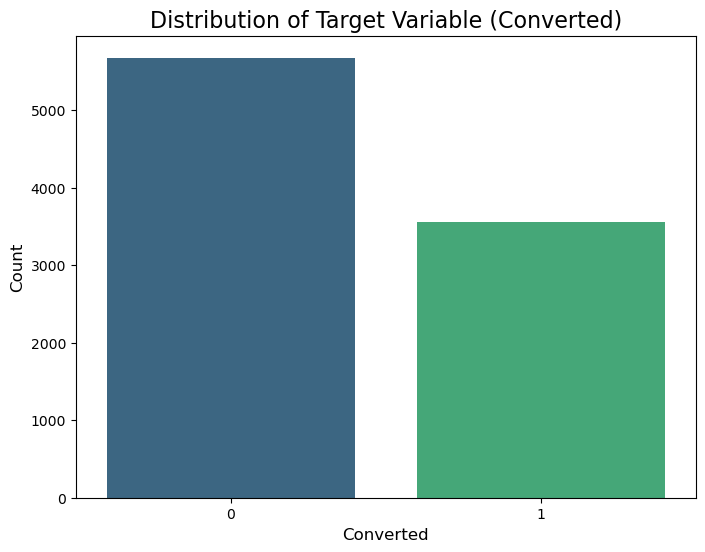

In [84]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Converted', palette='viridis')
plt.title('Distribution of Target Variable (Converted)', fontsize=16)
plt.xlabel('Converted', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

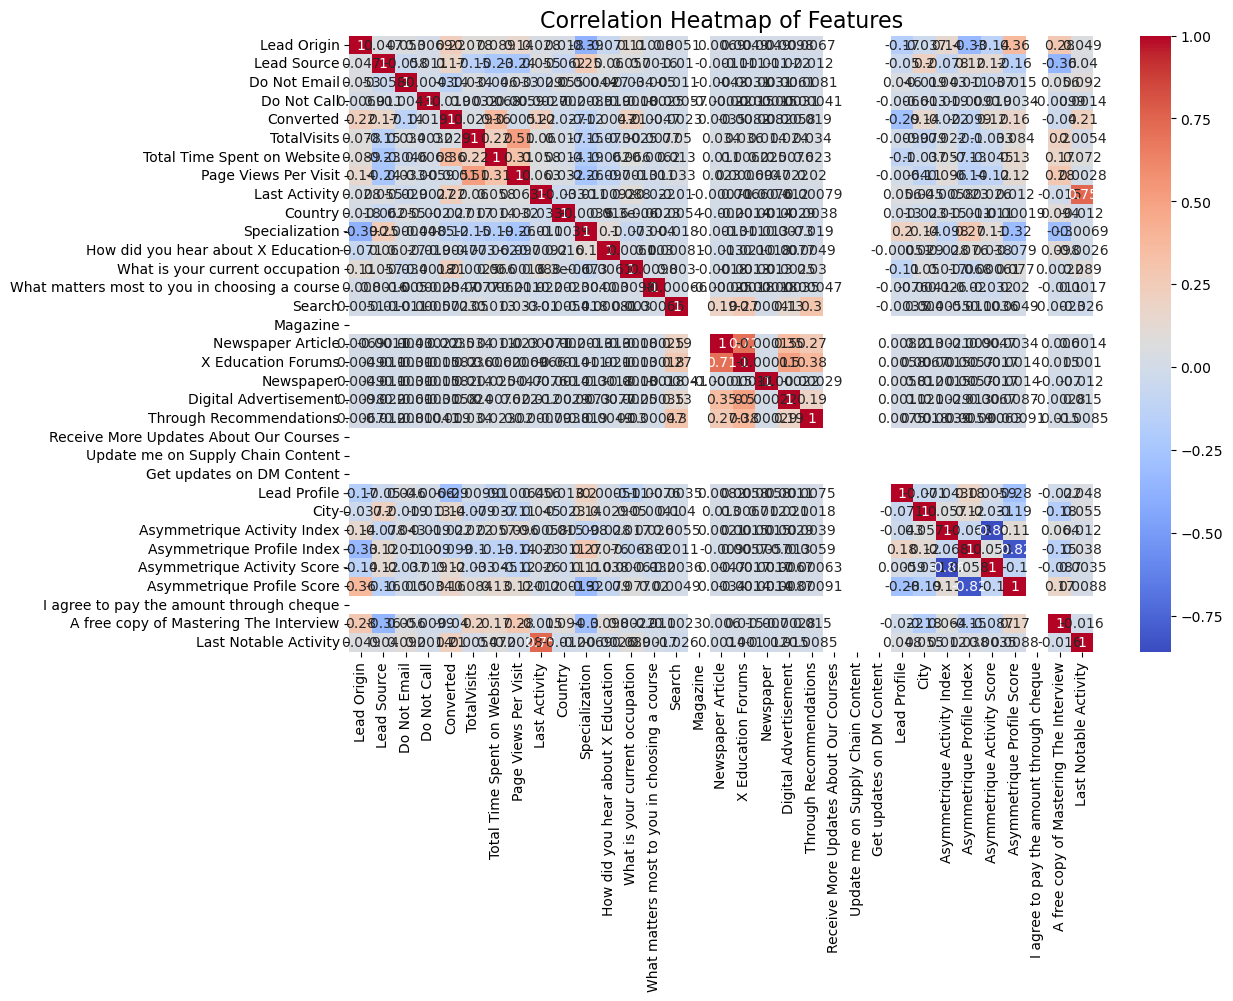

In [85]:
# Replace 'Select' with NaN
data_cleaned.replace('Select', np.nan, inplace=True)

# Fill missing values with the most frequent value in each column
data_cleaned.fillna(data_cleaned.mode().iloc[0], inplace=True)  # For categorical data

# Ensure that only numeric columns are used for correlation calculation
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Plotting a heatmap for feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()


In [86]:
# Ensure X is numeric and does not include non-numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Determining the maximum number of components that can be requested
n_components = min(X_numeric.shape[0], X_numeric.shape[1])

# Fit PCA with the adjusted number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_numeric)

# Get PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame with the loadings for each principal component
pca_loadings = pd.DataFrame(pca_components, columns=X_numeric.columns)


top_features_pc1 = pca_loadings.iloc[0].abs().nlargest(10)
print(f"Top features for PC1:\n{top_features_pc1}")


Top features for PC1:
Total Time Spent on Website           0.999995
TotalVisits                           0.001911
Specialization                        0.001745
Lead Source                           0.001285
Page Views Per Visit                  0.001231
Last Notable Activity                 0.000415
Last Activity                         0.000388
Asymmetrique Profile Score            0.000321
Lead Profile                          0.000190
How did you hear about X Education    0.000157
Name: 0, dtype: float64


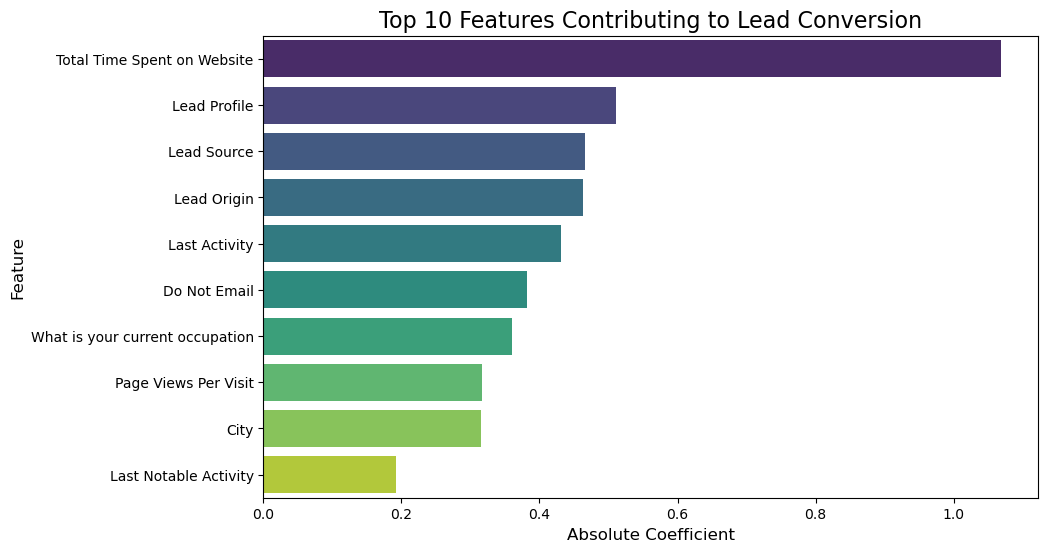

In [87]:


# Label Encoding for categorical columns (excluding 'Tags' and 'Lead Profile')
categorical_cols = [col for col in data_cleaned.select_dtypes(include=['object']).columns if col != 'Tags' and col != 'Lead Profile']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

X_encoded = data_cleaned.drop(columns=['Converted'])  # Assuming 'Converted' is the target variable

# Apply scaling to X_encoded
scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)

# After scaling, get the feature names
encoded_columns = X_encoded.columns

# Prepare the target variable 'Converted'
y_train = data_cleaned['Converted']

# Create a logistic regression model and fit the training data
model = LogisticRegression(solver='lbfgs', max_iter=2000, C=1.0, random_state=42)
model.fit(X_encoded_scaled, y_train)

# Map the coefficients to the feature names
coefficients = pd.DataFrame({
    'Feature': encoded_columns,  
    'Coefficient': model.coef_[0]
})

# Add a column for absolute value of coefficients
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

# Optionally filter out specific features (like 'Asymmetrique' or 'Tags')
coefficients = coefficients[~coefficients['Feature'].str.contains('Asymmetrique')]

# Getting the top 10 features with the highest absolute coefficients
top_10_features = coefficients.nlargest(10, 'Absolute Coefficient')

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_features,
    x='Absolute Coefficient',
    y='Feature',
    palette='viridis'
)
plt.title('Top 10 Features Contributing to Lead Conversion', fontsize=16)
plt.xlabel('Absolute Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()



In [88]:
# Ensure X_train and y_train have the same number of samples
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


# Making sure the indices are aligned
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

# Scale the data before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)  
X_test_pca = pca.transform(X_test_scaled)  

# Check the shape of the transformed data
print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train Logistic Regression model with PCA-reduced data
model.fit(X_train_pca, y_train)

# Predictions and Evaluation for PCA model
y_pred_pca = model.predict(X_test_pca)
y_pred_pca_proba = model.predict_proba(X_test_pca)[:, 1]

# Compute evaluation metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_pca_proba)

# Print PCA model metrics
print(f"PCA Accuracy: {accuracy_pca:.2f}")
print(f"PCA ROC-AUC: {roc_auc_pca:.2f}")


Shape of X_train: (7392, 32)
Shape of y_train: (9240,)
Shape of X_train_pca: (7392, 22)
Shape of X_test_pca: (1848, 22)
PCA Accuracy: 0.80
PCA ROC-AUC: 0.87


In [89]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (7392, 32)
Shape of y_train: (7392,)
Shape of X_train_scaled: (7392, 32)
Shape of y_train: (7392,)


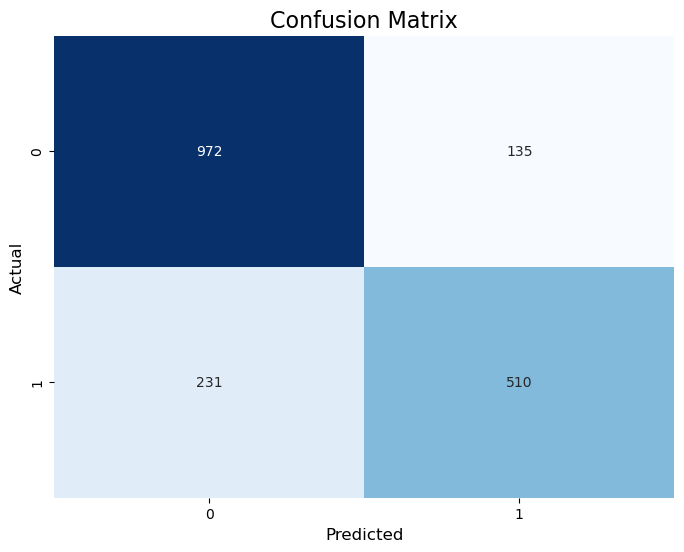

In [90]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

<Figure size 1200x600 with 0 Axes>

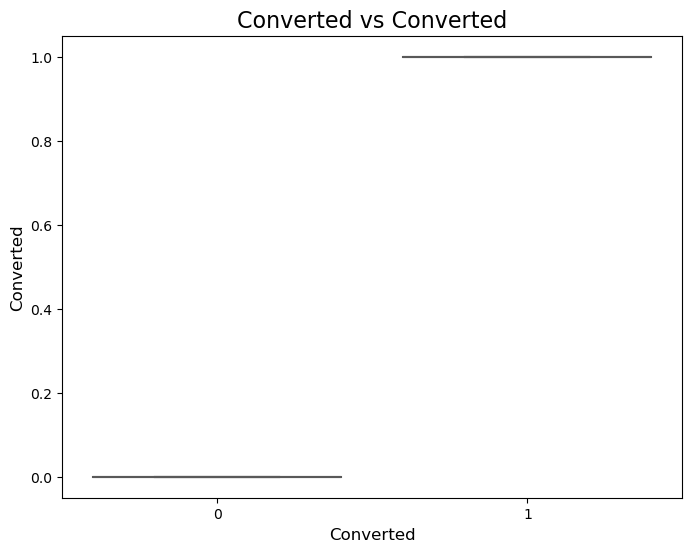

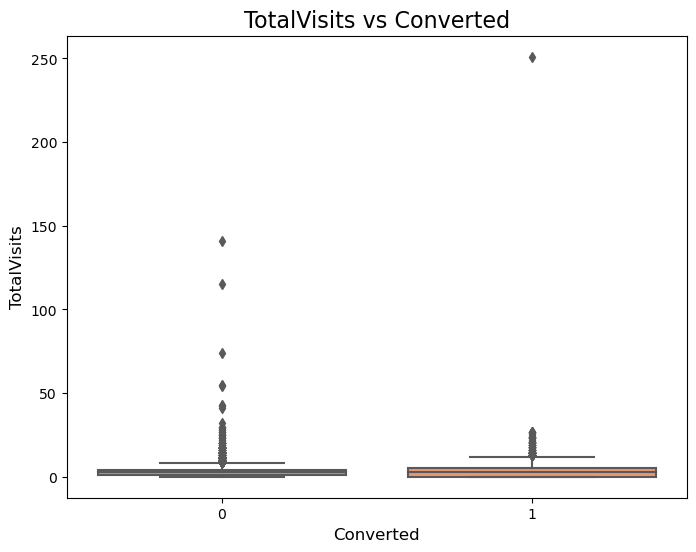

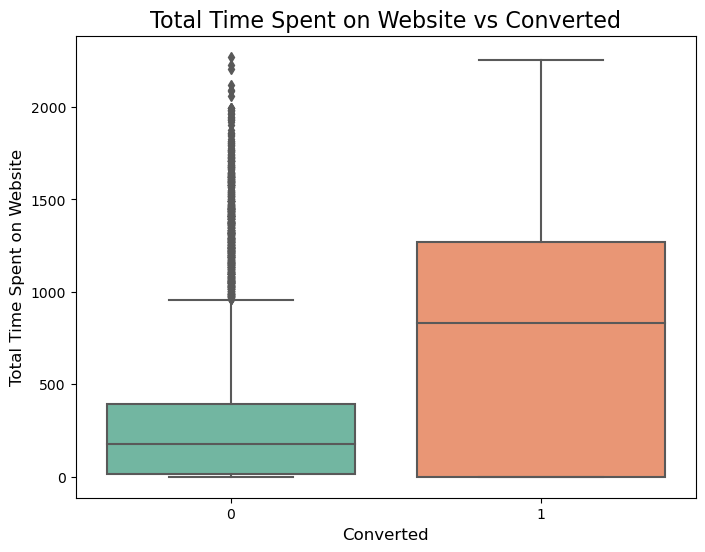

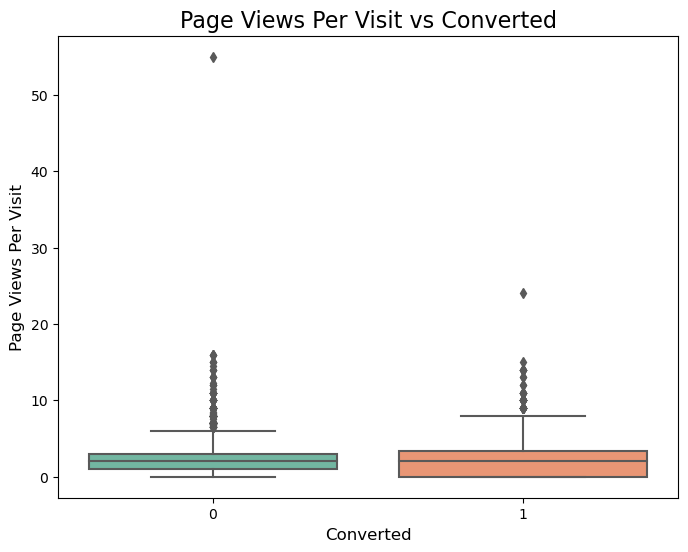

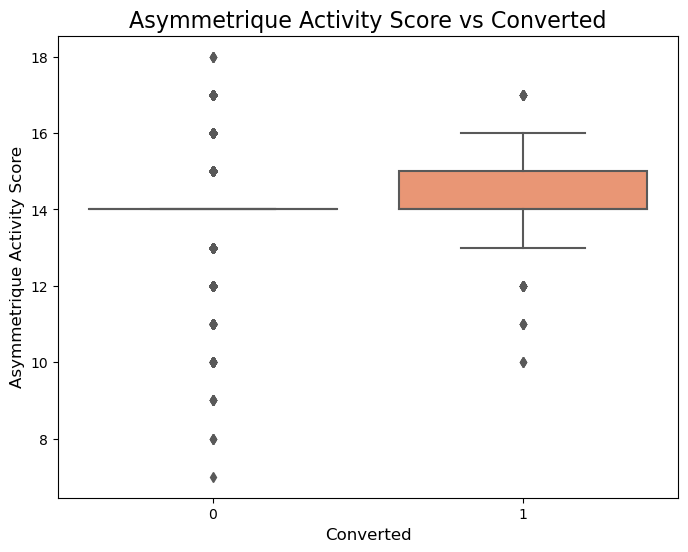

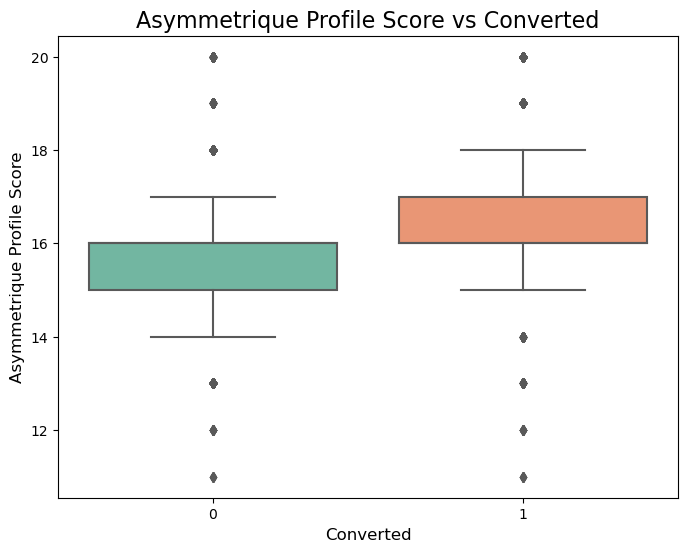

In [91]:

# Ensure only numeric columns are included
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Box plot for numerical features
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_cleaned, x='Converted', y=col, palette='Set2')
    plt.title(f'{col} vs Converted', fontsize=16)
    plt.xlabel('Converted', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()


In [92]:
# Inspect all features and their coefficients
print("\nAll Features and Their Coefficients:")
print(coefficients[['Feature', 'Coefficient']])



All Features and Their Coefficients:
                                          Feature  Coefficient
0                                     Lead Origin     0.462519
1                                     Lead Source     0.465384
2                                    Do Not Email    -0.381474
3                                     Do Not Call     0.090831
4                                     TotalVisits     0.056285
5                     Total Time Spent on Website     1.069405
6                            Page Views Per Visit    -0.316041
7                                   Last Activity     0.430804
8                                         Country    -0.008878
9                                  Specialization    -0.116021
10             How did you hear about X Education     0.059073
11                What is your current occupation     0.360756
12  What matters most to you in choosing a course    -0.017370
13                                         Search    -0.017588
14               

In [93]:
## Analysis using one hot encoding

Test Accuracy: 0.93
Accuracy: 0.93
Precision: 0.92
Recall: 0.90
F1 Score: 0.91
ROC-AUC: 0.97


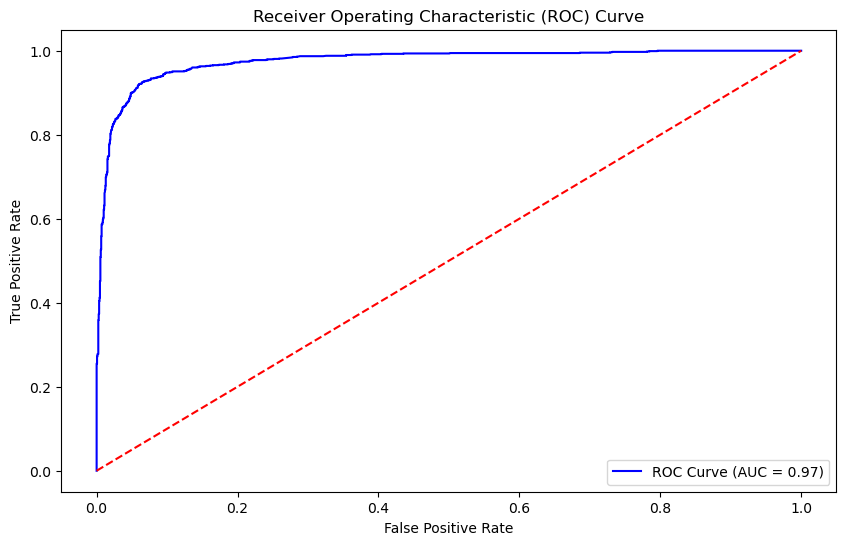


Top 3 Categorical Variables to Focus On:
                                      Feature  Coefficient
142  Tags_Will revert after reading the email     2.639541
125                   Tags_Closed by Horizzon     1.765437
133                         Tags_Lost to EINS     1.500414

Recommendation for aggressive lead conversion:
Focus on leads with the highest predicted probabilities (top 20%).

Recommendation for minimizing unnecessary calls:
Focus only on leads with predicted probabilities above 80%.


In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Data
file_path = r"C:\Users\hp\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv"
data = pd.read_csv(file_path)

# Data Cleaning
missing_threshold = 0.5
missing_data = data.isnull().mean()
data_cleaned = data.drop(columns=missing_data[missing_data > missing_threshold].index)
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])
irrelevant_columns = ['Prospect ID', 'Lead Number']
data_cleaned = data_cleaned.drop(columns=irrelevant_columns)

# Encoding Categorical Variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Splitting Data into Training and Testing Sets
X = data_encoded.drop('Converted', axis=1)  
y = data_encoded['Converted']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate Model
accuracy = model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict and calculate evaluation metrics
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Identify top contributing features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Answer specific business problems
categorical_importance = coefficients[coefficients['Feature'].str.contains('_')].head(3)
print("\nTop 3 Categorical Variables to Focus On:")
print(categorical_importance[['Feature', 'Coefficient']])

print("\nRecommendation for aggressive lead conversion:")
print("Focus on leads with the highest predicted probabilities (top 20%).")

print("\nRecommendation for minimizing unnecessary calls:")
print("Focus only on leads with predicted probabilities above 80%.")
